In [6]:
import os
import librosa
import numpy as np
import soundfile as sf

data_dir = '/content/KAGGLE/AUDIO'

output_dir = '/content/drive/MyDrive/DeepVoice'

segment_duration = 10

def segment_wav_file(audio_data, sr, segment_duration):
    segment_length = int(segment_duration * sr)
    segments = []

    for i in range(0, len(audio_data), segment_length):
        segment = audio_data[i:i + segment_length]

        if len(segment) < segment_length:
            continue

        segments.append(segment)

    return segments

def process_and_save_segments(data_dir, segment_duration, output_dir):
    classes = sorted(os.listdir(data_dir))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)

        os.makedirs(output_class_dir, exist_ok=True)

        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)

                audio_data, sr = librosa.load(file_path, sr=None)

                segments = segment_wav_file(audio_data, sr, segment_duration)

                for j, segment in enumerate(segments):
                    output_filename = f"{filename[:-4]}_segment_{j+1}.wav"  # Name each segment
                    output_filepath = os.path.join(output_class_dir, output_filename)

                    sf.write(output_filepath, segment, sr)
                    print(f"Saved {output_filepath}")

process_and_save_segments(data_dir, segment_duration, output_dir)


Training samples: 2088, Validation samples: 448, Test samples: 448


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         100,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,842 (468.13 KB)

 Trainable params: 119,650 (467.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8456 - loss: 5.8948 - val_accuracy: 0.9286 - val_loss: 3.4191
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9338 - loss: 3.1101 - val_accuracy: 0.9509 - val_loss: 2.5948
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9526 - loss: 2.4254 - val_accuracy: 0.9799 - val_loss: 1.9820
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - accuracy: 0.9609 - loss: 2.0648 - val_accuracy: 0.9330 - val_loss: 2.5726
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.9585 - loss: 2.3021 - val_accuracy: 0.9688 - val_loss: 2.0624
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.9528 - loss: 2.1051 - val_accuracy: 0.9777 - val_loss: 1.9177
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9618 - loss: 1.8721 - val_accuracy: 0.9821 - val_loss: 2.0406
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.9665 - loss: 1.9447 - 

Test Loss: 0.4808, Test Accuracy: 99.11%


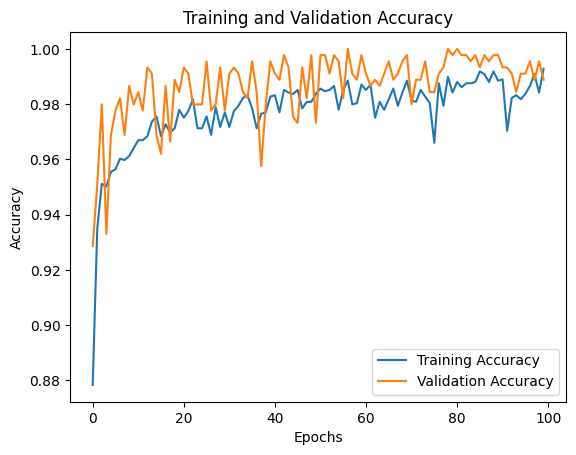

In [15]:
import os
import numpy as np
import librosa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.regularizers import l1_l2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Directory containing your dataset (with two class subdirectories)
data_dir = '/content/drive/MyDrive/DeepVoice/'

def load_and_preprocess_data(data_dir, target_length=16000, size=32):
    data = []
    labels = []
    classes = ["FAKE","REAL"]

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            audio_data, SR = librosa.load(file_path,sr=None)

            # Perform feature extraction
            mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=SR)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=SR, n_mfcc=40)

            # Resize features to the same shape
            mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), (size, size))
            mfccs = resize(np.expand_dims(mfccs, axis=-1), (size, size))

            # Concatenate features
            features = np.concatenate([mel_spectrogram, mfccs], axis=-1)

            data.append(features)
            labels.append(i)

    return np.array(data), np.array(labels), classes

# Load and preprocess data
X, y, classes = load_and_preprocess_data(data_dir)

# Split the dataset into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f'Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}')

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

# Define the CNN model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.8)(x)
output_layer = Dense(len(classes), activation='softmax', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
model = Model(input_layer, output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, min_lr=1e-12)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%')

# Save the final model
model.save('/content/drive/MyDrive/DeepVoice/KAGGLE/audio_classification_simple_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
